In [1]:
from os import listdir
import numpy as np
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D,BatchNormalization
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [2]:
def loadImages(path):
    imagesList = listdir(path)
    loadedImages = []
    for image in imagesList:
        img = cv2.imread(path + image)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        img = cv2.resize(img, (50,50))
        img = img.flatten()
        loadedImages.append(img)

    return loadedImages

In [3]:
path = "WSN-DS_1/train/Anomaly/"
aimgs = loadImages(path)
alabel =  np.ones(len(aimgs))*0

In [4]:
path = "WSN-DS_1/train/Normal/"
nimgs = loadImages(path)
nlabel =  np.ones(len(nimgs))*1

In [5]:
imgs = aimgs.copy()
imgs.extend(nimgs)

In [6]:
data = np.array(imgs)
data = data.reshape([-1,50,50,1])
labels = np.hstack((alabel,nlabel))
labels =np.uint8(labels)

In [7]:
X_train = data/255

In [8]:
y_train = to_categorical(labels)
num_classes = y_train.shape[1]

In [9]:
model = Sequential()
model.add(Conv2D(32,(5,5), input_shape=(50,50,1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
     
model.add(Conv2D(filters=32, kernel_size=(3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
    
model.add(Conv2D(filters=64, kernel_size=(3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.1))
    
model.add(Conv2D(filters=64, kernel_size=(3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
    
model.add(Flatten())
model.add(Dense(units=280, activation='relu'))
model.add(Dropout(0.5)) 
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))\

model.compile(loss='binary_crossentropy', optimizer='adam', metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 46, 46, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 23, 23, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 21, 21, 32)        9248      
_________________________________________________________________
activation (Activation)      (None, 21, 21, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 10, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 10, 10, 32)        1

In [14]:
history = model.fit(X_train, y_train, epochs=10, batch_size=100, verbose=2, shuffle=True)
model.save('Single_CNN_model_1.h5')  

Epoch 1/10
1686/1686 - 224s - loss: 0.0305 - accuracy: 0.9913
Epoch 2/10
1686/1686 - 228s - loss: 0.0306 - accuracy: 0.9915
Epoch 3/10
1686/1686 - 230s - loss: 0.0298 - accuracy: 0.9918
Epoch 4/10
1686/1686 - 239s - loss: 0.0292 - accuracy: 0.9919
Epoch 5/10
1686/1686 - 243s - loss: 0.0291 - accuracy: 0.9918
Epoch 6/10
1686/1686 - 239s - loss: 0.0288 - accuracy: 0.9919
Epoch 7/10
1686/1686 - 234s - loss: 0.0285 - accuracy: 0.9919
Epoch 8/10
1686/1686 - 237s - loss: 0.0283 - accuracy: 0.9921
Epoch 9/10
1686/1686 - 242s - loss: 0.0278 - accuracy: 0.9921
Epoch 10/10
1686/1686 - 235s - loss: 0.0279 - accuracy: 0.9924


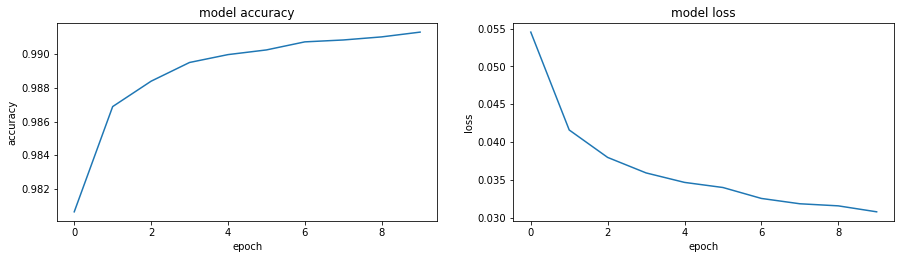

In [11]:
import matplotlib.pyplot as plt

%matplotlib inline
plt.figure(1, figsize = (15,8)) 
    
plt.subplot(221)  
plt.plot(history.history['accuracy'])   
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
    
plt.subplot(222)  
plt.plot(history.history['loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  

plt.show()